In [25]:
# import the usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hashlib 
import datetime
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#Music Data Loading
df = pd.read_csv("../../Dataset/lastfm/userid-timestamp-artid-artname-traid-traname.tsv", sep="\t", error_bad_lines=False, header = None)
# usersha_profile_df = pd.read_csv("../../Dataset/lastfm/usersha1-profile.tsv",sep='\t',names=['userId','gender','age','country','signupDate'])
# usersha_artist_df = pd.read_csv("../../Dataset/lastfm/usersha1-artmbid-artname-plays.tsv",sep='\t',names=['userId','artistId','artist','plays'])

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [3]:
df.columns = ['userid', 'timestamp', 'artistid', 'artist', '1', 'song']

In [4]:
df[:10]

,userid,timestamp,artistid,artist,1,song
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
5,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
6,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
7,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
8,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
9,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)


In [5]:
df['time'] = pd.to_datetime(df['timestamp'])

In [6]:
df.drop(['timestamp'], axis=1, inplace=True)

In [7]:
df.head()

,userid,artistid,artist,1,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


### Removing artist name and song id (possibly) from the user_songs_df dataframe

In [8]:
user_songs_df = df.drop(['artist'], axis=1, inplace=False)

In [9]:
user_songs_df.columns = ['userid', 'artistid', 'songid', 'song', 'time']

In [10]:
user_songs_df = user_songs_df.drop(['songid'], axis=1, inplace=False)

In [11]:
user_songs_df.head()

,userid,artistid,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


In [12]:
user_songs_df['song'].nunique()

1083471

In [15]:
def get_unique_count(column):
#     print("len of list : "+str(len(song_column)))
#     print("len of set : "+str(len(set(song_column))))
    return len(set(column))

In [16]:
df_songs_heard_10_users = user_songs_df.groupby("song").filter(lambda x: get_unique_count(x['userid'])>10)

In [17]:
df_songs_heard_10_users.head()

,userid,artistid,song,time
17,user_000001,463a94f1-2713-40b1-9c88-dcc9c0170cae,Elysian Fields,2009-05-03 15:10:18+00:00
18,user_000001,ad0811ea-e213-451d-b22f-fa1a7f9e0226,Planetary Deadlock,2009-05-03 15:04:31+00:00
20,user_000001,6f3d4a7b-45b2-4c08-9306-8d271e92cb4f,Deadly Species,2009-05-03 14:50:51+00:00
21,user_000001,463a94f1-2713-40b1-9c88-dcc9c0170cae,Cold Fusion,2009-05-03 14:46:29+00:00
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00


In [18]:
df_songs_heard_10_users['song'].nunique()

72545

In [19]:
df_songs_heard_10_users['userid'].nunique()

992

In [21]:
df_songs_heard_100_users = user_songs_df.groupby("song").filter(lambda x: get_unique_count(x['userid'])>100)

In [26]:
df_songs_heard_100_users.head()

,userid,artistid,song,time
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00


In [23]:
df_songs_heard_100_users['song'].nunique()

4034

In [24]:
df_songs_heard_100_users['userid'].nunique()

990

## Creation of timeslots

In [27]:
df_songs_heard_100_users['hour'] = df_songs_heard_100_users['time'].dt.hour

/Users/akshayj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_songs_heard_100_users.head()

,userid,artistid,song,time,hour
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15


In [29]:
#function to return slot number
def slot(hour):
    if 0 <= hour and hour <= 5:
        return 1
    elif 6 <= hour and hour <= 11:
        return 2
    elif 12 <= hour and hour <= 17:
        return 3
    else:
        return 4

In [30]:
%%time
df_songs_heard_100_users['slot'] = df_songs_heard_100_users['hour'].apply( lambda x : slot(x) ) 

CPU times: user 1.52 s, sys: 73.9 ms, total: 1.6 s
Wall time: 1.58 s


/Users/akshayj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_songs_heard_100_users.head()

,userid,artistid,song,time,hour,slot
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14,3
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14,3
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13,3
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13,3
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15,3


In [32]:
df_songs_heard_100_users['slot'].value_counts()

4    1295828
3    1164899
1     770722
2     690652
Name: slot, dtype: int64

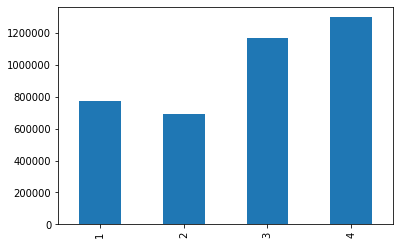

In [33]:
df_songs_heard_100_users['slot'].value_counts().sort_index()[:].plot(kind='bar')

In [46]:
df_songs_heard_100_users.shape

(3922101, 6)

## Generating training and testing data

In [35]:
user_record_counts = df_songs_heard_100_users.groupby("userid").apply(lambda x: x.shape[0])

In [82]:
train_set_keys = []
test_set_keys = []
sum_val = 0
total = df_songs_heard_100_users.shape[0]
for key, value in user_record_counts.items():
    sum_val += value
    fraction = sum_val/total
    if fraction <= 0.8:
        train_set_keys.append(key)        
    else:
        test_set_keys.append(key)

In [90]:
print("Number of users in train set : "+str(len(train_set_keys)))
print("Number of users in test set : "+str(len(test_set_keys)))

Number of users in train set : 792
Number of users in test set : 198


In [85]:
train_set = df_songs_heard_100_users.groupby("userid").filter(lambda x: x['userid'].iloc[0] in train_set_keys)
test_set = df_songs_heard_100_users.groupby("userid").filter(lambda x: x['userid'].iloc[0] in test_set_keys)

In [91]:
print("Number of users in train set : "+str(train_set['userid'].nunique()))
print("Number of users in test set : "+str(test_set['userid'].nunique()))

Number of users in train set : 792
Number of users in test set : 198


In [89]:
train_set.shape[0]/total

0.7984888711432979

In [93]:
train_set.head()

,userid,artistid,song,time,hour,slot
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14,3
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14,3
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13,3
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13,3
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15,3


# Use these dataframes

In [154]:
train_set.head()

,userid,artistid,song,time,hour,slot
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14,3
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14,3
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13,3
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13,3
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15,3


In [155]:
test_set.head()

,userid,artistid,song,time,hour,slot
15511029,user_000802,cef9233d-78ef-41d5-9bac-f2ca21aa4a40,Left Behind,2009-06-18 21:50:55+00:00,21,4
15511035,user_000802,b6cca708-1083-4bbb-8ba1-237d832088e4,Tomorrow,2009-06-18 21:26:14+00:00,21,4
15511043,user_000802,b6cca708-1083-4bbb-8ba1-237d832088e4,Intermission,2009-06-18 20:51:52+00:00,20,4
15511054,user_000802,b6cca708-1083-4bbb-8ba1-237d832088e4,Tomorrow,2009-06-18 20:01:56+00:00,20,4
15511061,user_000802,b6cca708-1083-4bbb-8ba1-237d832088e4,Tomorrow,2009-06-18 19:34:31+00:00,19,4


# Exmeriments

In [61]:
user_song_df_count = user_songs_df.groupby(["userid","song"]).size().reset_index(name="Count")

In [62]:
user_song_df_count.head()

,userid,song,Count
0,user_000001,'84 Pontiac Dream,14
1,user_000001,(All I Wanted Was To Make You) Feel Good,3
2,user_000001,(D)Ecaying Beauty,1
3,user_000001,(Far From) Home,1
4,user_000001,(Get Off Your) High Horse Lady,1


In [64]:
user_song_df_count.nunique()

userid        992
song      1083471
Count         534
dtype: int64

## Experimenting with Hashing

In [152]:
h = hashlib.new('sha1')
h.update(b'user_000002')
print(h.hexdigest())

209c068022cfd29ddb5da3d638898eb43821f68f


In [146]:
h = hashlib.sha256()
h.update(b'user_000002')
print(h.digest())

b'Sf\x8f\xba\x99\xc2\xe6\xfe\xd9\x93\x90\xff-\xe6\r \xe6\x8c}%\x1dEF\xf0{\xcba\\;\xaf\x9ec'


In [106]:
print('00000c289a1829a808ac09c00daf10bc3c4e223b')

00000c289a1829a808ac09c00daf10bc3c4e223b


## Creating user profile

In [94]:
usersha_profile_df = pd.read_csv("../../Dataset/lastfm/usersha1-profile.tsv",sep='\t',names=['userId','gender','age','country','signupDate'])
usersha_artist_df = pd.read_csv("../../Dataset/lastfm/usersha1-artmbid-artname-plays.tsv",sep='\t',names=['userId','artistId','artist','plays'])

In [95]:
profile_df = pd.merge(usersha_profile_df, usersha_artist_df, on='userId', how='left')

In [97]:
profile_df.head()

,userId,gender,age,country,signupDate,artistId,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137.0
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099.0
2,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897.0
3,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717.0
4,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706.0


In [100]:
print("Number of countries in the profile : " + str(profile_df['country'].nunique()))

Number of countries in the profile : 239


In [101]:
profile_df['country'].value_counts()

United States         3336367
Germany               1555734
United Kingdom        1500779
Poland                 997713
Russian Federation     891370
                       ...   
Marshall Islands          166
Gambia                    161
Benin                     155
Palau                     149
Liberia                   141
Name: country, Length: 239, dtype: int64

In [153]:
# profile_df['userId'].unique()[350000:350100]